In [39]:
pip install wordcloud


In [40]:
from wordcloud import WordCloud


In [18]:
import matplotlib.pyplot as plt

In [19]:
def is_space(char):
    return char == ' '

def is_alphanumeric(char):
    return ('a' <= char <= 'z') or ('A' <= char <= 'Z') or ('0' <= char <= '9')

In [20]:
def custom_strip(text):
    start = 0
    while start < len(text) and is_space(text[start]):
        start += 1
    end = len(text)
    while end > 0 and is_space(text[end - 1]):
        end -= 1
    return text[start:end]

In [21]:
def lower(text):
    result = []
    for char in text:
        if 'A' <= char <= 'Z':
            result.append(chr(ord(char) + 32))
        else:
            result.append(char)
    return ''.join(result)

In [22]:
def get_words(text):
    text = text.lower()
    result = []
    i = 0

    while i < len(text):
        if is_alphanumeric(text[i]) or is_space(text[i]):
            result.append(text[i])
        elif text[i] == "'" and i > 0 and i < len(text) - 1 and is_alphanumeric(text[i - 1]) and is_alphanumeric(text[i + 1]):
            result.append(text[i])
        elif text[i] == "-" and i > 0 and i < len(text) - 1 and is_alphanumeric(text[i - 1]) and is_alphanumeric(text[i + 1]):
            result.append(text[i])
        elif text[i] == "." and i > 0 and i < len(text) - 1 and is_alphanumeric(text[i - 1]) and is_alphanumeric(text[i + 1]):
            result.append(text[i])
        elif text[i] in "&@_%$":
            result.append(text[i])
        i += 1

    cleaned_text = ''.join(result)
    return cleaned_text.split()

In [23]:
def count_word_frequencies(words):
    word_count = {}
    for word in words:
        word = custom_strip(word)
        if word:
            if word in word_count:
                word_count[word] += 1
            else:
                word_count[word] = 1
    return word_count



In [24]:
def custom_sort(items):
    n = len(items)
    for i in range(n):
        for j in range(0, n - i - 1):
            if (items[j][1] < items[j + 1][1]) or (items[j][1] == items[j + 1][1] and items[j][0] > items[j + 1][0]):
                items[j], items[j + 1] = items[j + 1], items[j]
    return items


In [25]:
# Function to write the sorted word counts to the output file
def write_output(sorted_word_count, output_file):
    with open(output_file, 'w') as file:
        for word, count in sorted_word_count:
            file.write(f"{word} {count}\n")

# Function to read the input text from a file
def read_input(input_file):
    with open(input_file, 'r') as file:
        text = file.read()
    return text




In [27]:
def plot_word_frequencies(sorted_word_count):
    words = [item[0] for item in sorted_word_count[:20]]
    frequencies = [item[1] for item in sorted_word_count[:20]]

    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color='skyblue')

    plt.xlabel('Words')
    plt.ylabel('Frequencies')
    plt.title('Top 20 Word Frequency Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

In [28]:
def plot_word_lengths(words):
    word_lengths = [len(word) for word in words]
    plt.figure(figsize=(10, 6))
    plt.hist(word_lengths, bins=range(1, max(word_lengths) + 2), color='salmon', alpha=0.75)
    plt.xlabel('Word Lengths')
    plt.ylabel('Frequency')
    plt.title('Distribution of Word Lengths')
    plt.show()


In [29]:
def generate_word_cloud(word_count):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Most Frequent Words')
    plt.show()

In [30]:
def plot_cumulative_frequency(sorted_word_count):
    frequencies = [item[1] for item in sorted_word_count]
    cumulative = [sum(frequencies[:i+1]) for i in range(len(frequencies))]
    total = cumulative[-1]

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(frequencies)), [x / total for x in cumulative], marker='o', color='green')
    plt.xlabel('Number of Words')
    plt.ylabel('Cumulative Frequency')
    plt.title('Cumulative Frequency Distribution')
    plt.grid()
    plt.show()

In [41]:
def main():
    input_file = 'input.txt'
    output_file = 'output(1).txt'

    text = read_input(input_file)
    text = custom_strip(text)
    words = get_words(text)
    word_count = count_word_frequencies(words)

    sorted_word_count = custom_sort(list(word_count.items()))
    write_output(sorted_word_count, output_file)

    # Perform EDA
    plot_word_lengths(words)
    generate_word_cloud(word_count)
    plot_cumulative_frequency(sorted_word_count)

    # Plot top words
    plot_word_frequencies(sorted_word_count)

    print("The frequency of words is calculated and stored in output(1).txt")

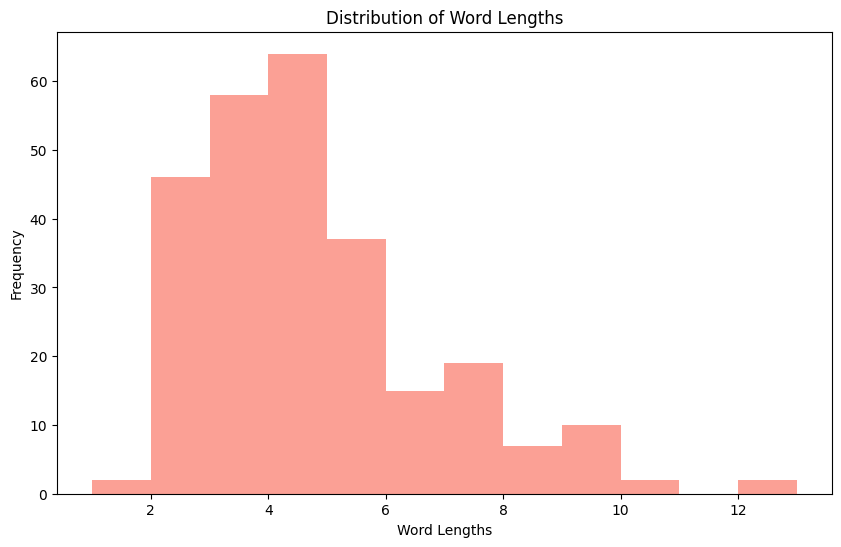

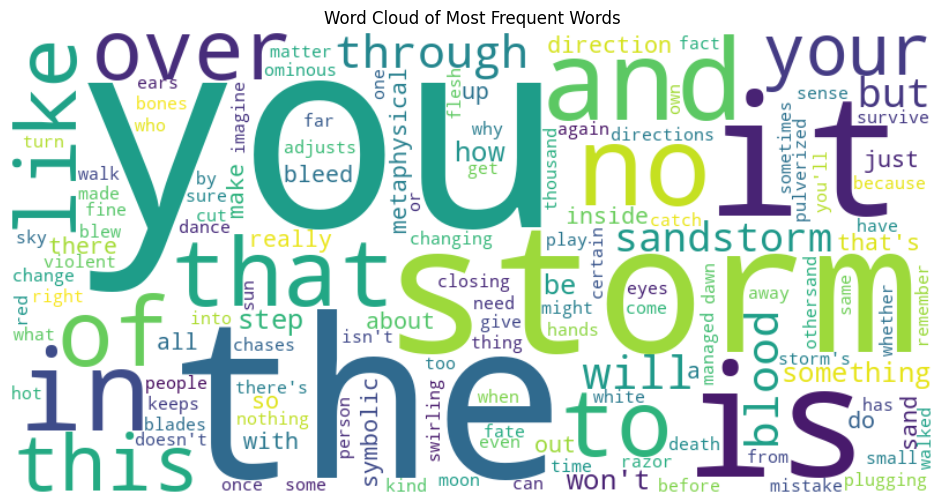

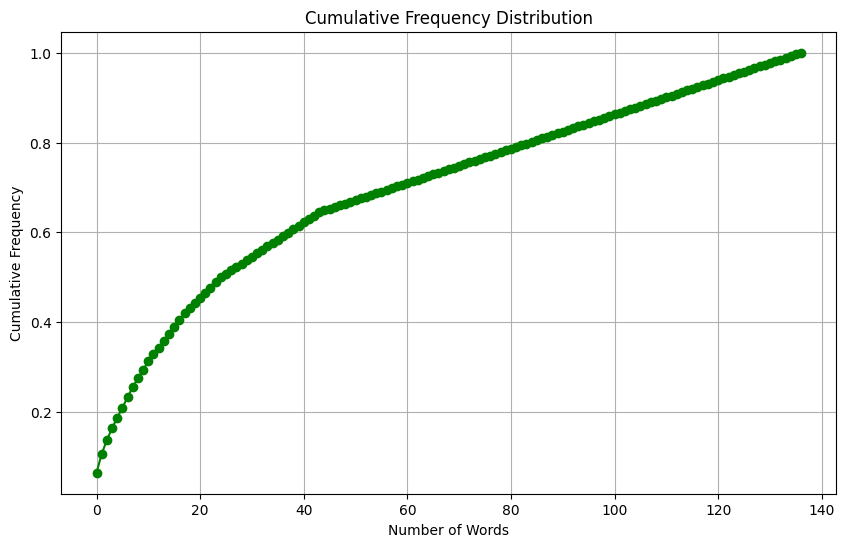

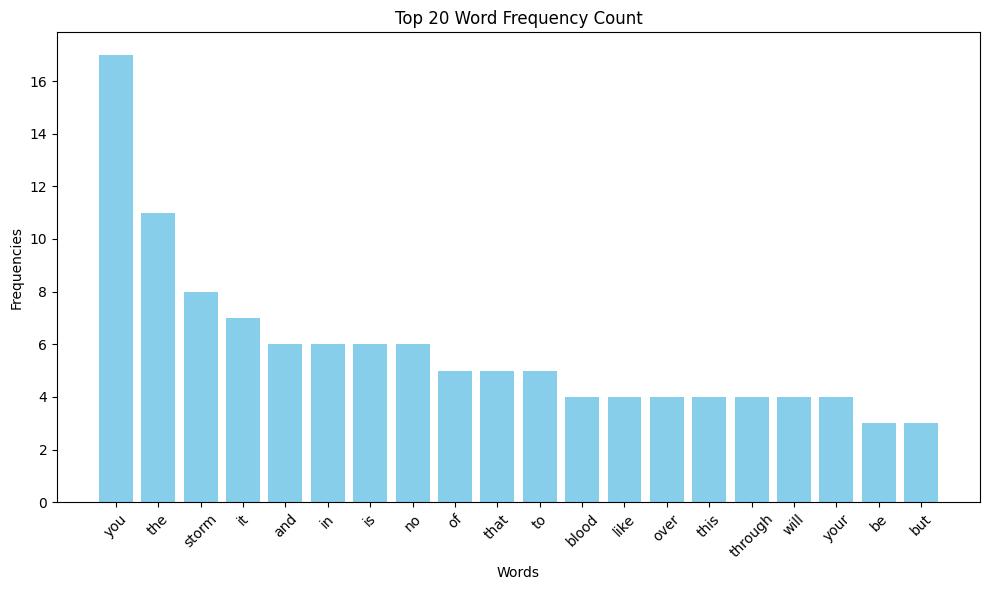

The frequency of words is calculated and stored in output(1).txt


In [43]:
if __name__ == "__main__":
    main()